In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random
import copy


## Solo Blackjack Gameplay

Here, we'll implement the most basic form of blackjack:


1.   The player starts off with a stack of 1000
2.   Blackjack pays 3 to 2
3.   A bet of 0 or less terminates the program, displaying the player's stack over time on a chart
3.   Deck is reshuffled after a certain number of cards is gone through (these are customizable in the program)



In [50]:
# Initialize the deck of cards
deck_s = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck_h = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck_d = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck_c = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck = []
prop_to_shuffle = 0.4
cards_used = 0

num_decks = 7
cards_to_shuffle = 52*prop_to_shuffle*num_decks//1
for i in range (num_decks*4):
  deck.append(copy.deepcopy(deck_s))
new_deck = copy.deepcopy(deck)




def debugger():
  global cards_used, deck, new_deck
  print(cards_used, "\n", deck,"\n", new_deck)

# Define the function to deal a card
def deal_card():
  global cards_used, deck, new_deck
  if cards_used >= cards_to_shuffle:
    deck = copy.deepcopy(new_deck)
    cards_used = 0
    # print("Deck is shuffled!")
  cards_used += 1
  while True:
    int1 = random.randint(0,4*num_decks-1)
    if len(deck[int1]) > 0:
      return deck[int1].pop(random.randint(0,len(deck[int1])-1))

# Define the function to calculate the score of a hand
def calculate_score(hand):
  score = sum(hand)
  for i in hand:
    if i==11 and score > 21:
      score-=10
  return score

# Define the function to play a game of blackjack
def play_blackjack(): #I think I should split this into two functions: one that calculates each round, the other that runs that and manages the stack
  player_stack = 1000
  bet = 0
  stack_amount = []
  # Play the player's turn
  while True:
    stack_amount.append(player_stack)
    blackjack = False
    dealer_bj = False
    player_bust = False
    print("Your stack: " + str(player_stack))
    while True:
      debugger()
      print("-"*10)
      bet = input("How much to bet? ")
      if bet.isnumeric():
        bet = float(bet)
        player_stack -= bet
        break
      else:
          while not bet.isnumeric():
            bet = input("How much to bet? ")
          bet = float(bet)
          player_stack -= bet
          break
    if (bet <= 0):
      plt.plot(range(0,len(stack_amount)),stack_amount)
      break
    player_hand = [deal_card(), deal_card()]
    dealer_hand = [deal_card(), deal_card()]
    # Print the player's hand and score
    print("Player's hand:", player_hand)
    print("Dealer's hand:", dealer_hand[0])
    print("Player's score:", calculate_score(player_hand))

    if sum(player_hand) == 21 and sum(dealer_hand) < 21:
      print("blackjack!")
      blackjack = True
      player_stack += bet * 2.5
    elif sum(player_hand) < 21 and sum(dealer_hand) == 21:
      print("Dealer's blackjack!")
      dealer_bj = True


    while not blackjack and not dealer_bj:
      # Get the player's input
      print("Player's hand:", player_hand)
      print("Dealer's hand:", dealer_hand[0])
      choice = input("Hit or stand? (h/s) ")

      # If the player hits, deal them another card
      if choice == "h":
        player_hand.append(deal_card())
        print("Player's hand:", player_hand)

      # If the player stands, break out of the loop
      elif choice == "s":
        break

      # If the player busts, they lose
      if calculate_score(player_hand) > 21:
        # print("Player's hand:", player_hand)
        print("Player busts!")
        player_bust = True
        break
    # Play the dealer's turn
    while calculate_score(dealer_hand) < 17 and not player_bust:
      dealer_hand.append(deal_card())

    # Print the dealer's hand and score
    print("Dealer's hand:", dealer_hand)
    print("Dealer's score:", calculate_score(dealer_hand))

    # Determine the winner
    if not (blackjack or dealer_bj or player_bust):
      if calculate_score(player_hand) > calculate_score(dealer_hand) and calculate_score(player_hand) <= 21 or calculate_score(dealer_hand)>21:
        print("Player wins!")
        player_stack+= 2*bet
      elif calculate_score(dealer_hand) > calculate_score(player_hand) and calculate_score(dealer_hand) <= 21 or calculate_score(player_hand)>21:
        print("Dealer wins!")
      else:
        print("Tie!")
        player_stack+=bet


# play_blackjack() 

In [51]:
def refine_player(): #I think I should split this into two functions: one that calculates each round, the other that runs that and manages the stack
  player_stack = 1000
  bet = 0
  stack_amount = []
  # Play the player's turn
  while True:
    print("-"*10)
    stack_amount.append(player_stack)
    blackjack = False
    dealer_bj = False
    player_bust = False
    print("Bot stack: " + str(player_stack))

    bet = 10 #Might add in some bet variance with the bot in later devs
    
    player_stack -= bet
    player_hand = [deal_card(), deal_card()]
    dealer_hand = [deal_card(), deal_card()]
    # Print the player's hand and score
    print("Player's hand:", player_hand)
    print("Dealer's :", dealer_hand[0])
    print("Player's scorhande:", calculate_score(player_hand))

    if sum(player_hand) == 21 and sum(dealer_hand) < 21:
      print("blackjack!")
      blackjack = True
      player_stack += bet * 2.5
    elif sum(player_hand) < 21 and sum(dealer_hand) == 21:
      print("Dealer's blackjack!")
      dealer_bj = True


    while not blackjack and not dealer_bj:
      choice = input("hit or stand?")
      if choice=="h":
        choice = True
      else:
        choice = False

      # If the player hits, deal them another card
      if choice:
        player_hand.append(deal_card())
        print("Player's hand:", player_hand)

      # If the player stands, break out of the loop
      else:
        break

      # If the player busts, they lose
      if calculate_score(player_hand) > 21:
        # print("Player's hand:", player_hand)
        print("Player busts!")
        player_bust = True
        break
    # Play the dealer's turn
    while calculate_score(dealer_hand) < 17 and not player_bust and not blackjack:
      dealer_hand.append(deal_card())

    # Print the dealer's hand and score
    print("Dealer's hand:", dealer_hand)
    print("Dealer's score:", calculate_score(dealer_hand))

    # Determine the winner
    if not (blackjack or dealer_bj or player_bust):
      if calculate_score(player_hand) > calculate_score(dealer_hand) and calculate_score(player_hand) <= 21 or calculate_score(dealer_hand)>21:
        print("Player wins!")
        player_stack+= 2*bet
      elif calculate_score(dealer_hand) > calculate_score(player_hand) and calculate_score(dealer_hand) <= 21 or calculate_score(player_hand)>21:
        print("Dealer wins!")
      else:
        print("Tie!")
        player_stack+=bet
# refine_player()

### Basic Strategy Computation


In [52]:
deck

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5,

In [53]:
def dealer_card(deck1):
  deck = copy.deepcopy(deck1)
  while True:
    int1 = random.randint(0,3)
    if len(deck[int1]) > 0:
      return (deck[int1].pop(random.randint(0,len(deck[int1])-1)), deck)
## Dealer's distributions
def compute_dealer(deck, trials):
  def compute_dealer1(deck, dealer_hand,trials):
    """
    deck: nested arrays of all the cards still in the deck
    dealer_hand: array of cards that the dealer has face-up right now
    @ return: array that holds the probability of stopping at each possible sum
    """
    prob_dist = list(np.zeros(6))
    deck1 = copy.deepcopy(deck)

    for i in range(trials):
      dealer_hand1 = copy.deepcopy(dealer_hand)
      deck=copy.deepcopy(deck1)
      while calculate_score(dealer_hand1)<17:
        value = dealer_card(deck)
        dealer_hand1.append(value[0])
        deck = value[1]
        # print(deck)
      if (calculate_score(dealer_hand1)<=21):  
        
        prob_dist[calculate_score(dealer_hand1)-17]+=1
      else:
        prob_dist[-1]+=1
    prob_dist = np.asarray(prob_dist)/np.sum(prob_dist)
    return prob_dist
  dealer_matrix = []
  for i in range(2,12):
    dealer_matrix.append(compute_dealer1(deck, [i],trials))
# list(range(2,12))
  return dealer_matrix
dealer_matrix = compute_dealer(deck, 3000)
dealer_matrix

[array([0.139     , 0.13333333, 0.127     , 0.129     , 0.118     ,
        0.35366667]),
 array([0.12866667, 0.12466667, 0.12033333, 0.12233333, 0.125     ,
        0.379     ]),
 array([0.13633333, 0.12366667, 0.13733333, 0.11766667, 0.11066667,
        0.37433333]),
 array([0.12033333, 0.122     , 0.12033333, 0.11933333, 0.11366667,
        0.40433333]),
 array([0.163     , 0.11233333, 0.10933333, 0.10833333, 0.096     ,
        0.411     ]),
 array([0.36333333, 0.15433333, 0.07533333, 0.07733333, 0.076     ,
        0.25366667]),
 array([0.12533333, 0.35866667, 0.12733333, 0.07133333, 0.07666667,
        0.24066667]),
 array([0.126     , 0.109     , 0.35666667, 0.11933333, 0.062     ,
        0.227     ]),
 array([0.11066667, 0.108     , 0.11733333, 0.346     , 0.10733333,
        0.21066667]),
 array([0.12466667, 0.12666667, 0.139     , 0.13233333, 0.36266667,
        0.11466667])]

In [54]:
dealer_matrix # each array within here represents one of the dealer's hands from 2-A, and each entry within this matrix represents the probability of ending up at a sum of 17, 18, 19, 20, 21, and busting. 

[array([0.139     , 0.13333333, 0.127     , 0.129     , 0.118     ,
        0.35366667]),
 array([0.12866667, 0.12466667, 0.12033333, 0.12233333, 0.125     ,
        0.379     ]),
 array([0.13633333, 0.12366667, 0.13733333, 0.11766667, 0.11066667,
        0.37433333]),
 array([0.12033333, 0.122     , 0.12033333, 0.11933333, 0.11366667,
        0.40433333]),
 array([0.163     , 0.11233333, 0.10933333, 0.10833333, 0.096     ,
        0.411     ]),
 array([0.36333333, 0.15433333, 0.07533333, 0.07733333, 0.076     ,
        0.25366667]),
 array([0.12533333, 0.35866667, 0.12733333, 0.07133333, 0.07666667,
        0.24066667]),
 array([0.126     , 0.109     , 0.35666667, 0.11933333, 0.062     ,
        0.227     ]),
 array([0.11066667, 0.108     , 0.11733333, 0.346     , 0.10733333,
        0.21066667]),
 array([0.12466667, 0.12666667, 0.139     , 0.13233333, 0.36266667,
        0.11466667])]

In [55]:
deck

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5,

In [56]:
busting_freq = list(np.zeros(10))
for i in range(len(dealer_matrix)):
  for j in range(5,len(dealer_matrix[i])):
    busting_freq[i]+=dealer_matrix[i][j]
busting_freq

[0.3536666666666667,
 0.379,
 0.37433333333333335,
 0.4043333333333333,
 0.411,
 0.25366666666666665,
 0.24066666666666667,
 0.227,
 0.21066666666666667,
 0.11466666666666667]

,0
2,0.353667
3,0.379000
4,0.374333
5,0.404333
6,0.411000
7,0.253667
8,0.240667
9,0.227000
10,0.210667
11,0.114667


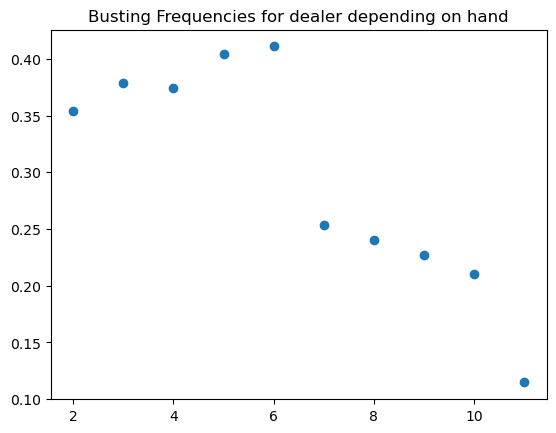

In [57]:
plt.scatter(range(2,12),busting_freq)
plt.title("Busting Frequencies for dealer depending on hand")
display(pd.DataFrame(busting_freq,range(2,12)))
plt.show()


## Computing optimal moves

In [58]:
list(range(0,-3))

[]

In [68]:
def stand_prob(player_hand, dealer_hand, dealer_matrix):
    """"
    Computes the probability of winning if the player stands
    """
    dealer_sum = calculate_score(dealer_hand)
    W_prob = 0
    if (calculate_score(player_hand)<=21):
        index = calculate_score(player_hand)-17
        for i in range(0,index):
            W_prob+=dealer_matrix[dealer_hand[0]-2][i] ## Summing up all the probs of dealer getting a lower hand
        W_prob+=dealer_matrix[dealer_hand[0]-2][-1] ## Adding on busting frequency for dealer
    return W_prob
stand_prob([10,2],[9],dealer_matrix) ## Testing this out here

0.227

In [60]:
deck

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5,

### Hit Probability Algorithm Outline

Obviously we should hit anything at 11 or below. But what about 12-20? (we're being a bit more liberal about the upper end). 

Here's what I'm thinking: at the higher ends, one only needs to compare $P(\text{hitting and standing})$ against $P(\text{standing})$. At the cutoff, the sum $n$ where holding a sum of $n$ or below necessitates hitting as an optimal strategy will have 

$$P(\text{hitting and standing}) > P(\text{standing})$$

But note that this $P(\text{hitting and standing})$ is the only probability we need to compute for any current player hand sum. Clearly, this probability will be greater the lower our sum is! (We don't even need to find the exact probability of winning by hitting)


In [66]:
def should_hit(player_hand, dealer_hand, dealer_matrix, deck):
    """"
    @return: Does hitting and standing have a better probability of winning than just standing?
    """
    def hit_and_stand_win_prob():
        """
        @return: Probability of winning if the current player hand hits and stands against dealer hand
        """
        win_prob = 0
        trials = 3000
        for j in range(trials):
            # exp_deck = copy.deepcopy(deck)     
            play_hand_copy = copy.deepcopy(player_hand) #resetting player hand after each test
            value = dealer_card(deck)[0] # note that we don't change the deck
            play_hand_copy.append(value) #adding in the card to player hand
            win_prob += stand_prob(play_hand_copy,dealer_hand,dealer_matrix)/trials
        return win_prob
    a = hit_and_stand_win_prob()
    b = stand_prob(player_hand,dealer_hand,dealer_matrix)
    print(a,b)
    return a>b            
print(should_hit([7,6],[2],dealer_matrix,deck) )


0.32349844444444176 0.3536666666666667
False


In [67]:
deck

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5,

### Putting it All Together

We just need a space for the bot to place bets and play!

In [ ]:
def bot_backend(player_hand, dealer_hand, deck):
    """"
    Computes and updates all variables to determine if bot should hit or stand
    @returns bot's decision to hit or stand
    """
    new_dealer_matrix = compute_dealer(deck, dealer_hand,3000)
    return should_hit(player_hand, dealer_hand, new_dealer_matrix, deck)
## Should add another one where the bot determines if the deck favors or doesn't favor the bot over the dealer (through trials?)

In [69]:
dealer_matrix = compute_dealer(deck, 3000)


In [71]:
def play_blackjack_bot(): #I think I should split this into two functions: one that calculates each round, the other that runs that and manages the stack
  player_stack = 1000
  bet = 0
  stack_amount = []
  # Play the player's turn
  while True:
    stack_amount.append(player_stack)
    blackjack = False
    dealer_bj = False
    player_bust = False
    print("Bot stack: " + str(player_stack))

    bet = 10 #Might add in some bet variance with the bot in later devs
    
    player_stack -= bet
    player_hand = [deal_card(), deal_card()]
    dealer_hand = [deal_card(), deal_card()]
    # Print the player's hand and score
    print("Player's hand:", player_hand)
    print("Dealer's hand:", dealer_hand[0])
    # print("Player's score:", calculate_score(player_hand))

    if sum(player_hand) == 21 and sum(dealer_hand) < 21:
      # print("blackjack!")
      blackjack = True
      player_stack += bet * 2.5
    elif sum(player_hand) < 21 and sum(dealer_hand) == 21:
      # print("Dealer's blackjack!")
      dealer_bj = True
    dealer_matrix = compute_dealer(deck, 3000)
    while not blackjack and not dealer_bj:
      choice = should_hit(player_hand, dealer_hand, dealer_matrix, deck)

      # If the player hits, deal them another card
      if choice:
        player_hand.append(deal_card())
        print("Player's hand:", player_hand)

      # If the player stands, break out of the loop
      else:
        break

      # If the player busts, they lose
      if calculate_score(player_hand) > 21:
        # print("Player's hand:", player_hand)
        # print("Player busts!")
        player_bust = True
        break
    # Play the dealer's turn
    while calculate_score(dealer_hand) < 17 and not player_bust and not blackjack:
      dealer_hand.append(deal_card())

    # Print the dealer's hand and score
    print("Dealer's hand:", dealer_hand)
    print("Dealer's score:", calculate_score(dealer_hand))

    # Determine the winner
    if not (blackjack or dealer_bj or player_bust):
      if (calculate_score(player_hand) > calculate_score(dealer_hand) and calculate_score(player_hand) <= 21) or calculate_score(dealer_hand)>21:
        # print("Player wins!")
        player_stack+= 2*bet
      elif calculate_score(dealer_hand) > calculate_score(player_hand) and calculate_score(dealer_hand) <= 21 or calculate_score(player_hand)>21:
        print("Dealer wins!")
      else:
        player_stack+=bet
        # print("Tie!")

def collect_bot_data():
  array = []
  
play_blackjack_bot()

Bot stack: 1000
Player's hand: [10, 11]
Dealer's hand: 5
Dealer's hand: [5, 8]
Dealer's score: 13
Bot stack: 1015.0
Player's hand: [7, 10]
Dealer's hand: 5
0.222301555555557 0.4256666666666667
Dealer's hand: [5, 3, 3, 10]
Dealer's score: 21
Bot stack: 1015.0
Player's hand: [10, 10]
Dealer's hand: 4
0.07122888888888874 0.768
Dealer's hand: [4, 9, 2, 11, 5]
Dealer's score: 21
Bot stack: 1015.0
Player's hand: [8, 10]
Dealer's hand: 4
0.1603526666666653 0.5456666666666666
Dealer's hand: [4, 5, 10]
Dealer's score: 19
Bot stack: 1015.0
Player's hand: [3, 10]
Dealer's hand: 5
0.35026700000000344 0.4513333333333333
Dealer's hand: [5, 10, 9]
Dealer's score: 24
Bot stack: 1025.0
Player's hand: [7, 10]
Dealer's hand: 10
0.1448447777777775 0.187
Dealer's hand: [10, 8]
Dealer's score: 18
Bot stack: 1025.0
Player's hand: [2, 9]
Dealer's hand: 10
0.4694565555555596 0.19966666666666666
Player's hand: [2, 9, 10]
0.0 0.8833333333333333
Dealer's hand: [10, 10]
Dealer's score: 20
Bot stack: 1035.0
Player'

KeyboardInterrupt: 

## Interface for bots & algorithms

Here, we'll try to extend this by examining different kinds of card-counting strategies and see how they fare over the long term, with base bet units of 1 to be simulated ____ number of times (fill this in later). Here are some betting bot strategies here:

1. Martingale: doubling bet after each loss, return to initial bet after a win

2. Hi-Lo: Most popular one, with 2,3,4,5,6 being +1, 7-9 being +0, and 10-A being -1 (more positive counts = better chance of winning). Bet will be (true count - 1) * (base betting unit)

3. Hi-Opt:

  1.   4 and 5 | +2
  2.   2, 3. 6. and 7 | +1
  2.   8 and 9 | +0
  2.   10 to K | -2

4. Constant bets, basic strategy